In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#  Loading Data

In [4]:
df=pd.read_excel('Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Familiarizing with Data

In [5]:
df.shape

(9994, 21)

In [6]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2018-119914,2018-05-04,2018-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [9]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2017-04-30 05:17:08.056834048,2017-05-04 04:17:20.304182528,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2016-05-23 00:00:00,2016-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2018-05-14 00:00:00,2018-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108


In [10]:
df=df.drop(['Row ID'], axis=1) 

In [11]:
df.head() 

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
df.duplicated().sum() 

1

In [13]:
num_e=df.select_dtypes(exclude='object').columns
num=df.select_dtypes(include=["int64","float64"])

In [14]:
num_e

Index(['Order Date', 'Ship Date', 'Postal Code', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [15]:
num

,Postal Code,Sales,Quantity,Discount,Profit
0,42420.0,261.9600,2,0.00,41.9136
1,42420.0,731.9400,3,0.00,219.5820
2,90036.0,14.6200,2,0.00,6.8714
3,33311.0,957.5775,5,0.45,-383.0310
4,33311.0,22.3680,2,0.20,2.5164
...,...,...,...,...,...
9989,33180.0,25.2480,3,0.20,4.1028
9990,92627.0,91.9600,2,0.00,15.6332
9991,92627.0,258.5760,2,0.20,19.3932
9992,92627.0,29.6000,4,0.00,13.3200


In [16]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9983.0,55245.233297,32038.715955,1040.000,23223.00000,57103.0000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [17]:
cat=df.select_dtypes(include=["object"])
cat

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,CA-2017-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2015-110422,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle
9990,CA-2018-121258,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...
9991,CA-2018-121258,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone
9992,CA-2018-121258,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5"""


In [18]:
cat.describe().T

,count,unique,top,freq
Order ID,9994,5009,CA-2018-100111,14
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,912
State,9994,49,California,2001
Region,9994,4,West,3203
Product ID,9994,1862,OFF-PA-10001970,19


In [19]:
contins=['Sales', 'Profit', 'Discount']
contins

['Sales', 'Profit', 'Discount']

<Axes: >

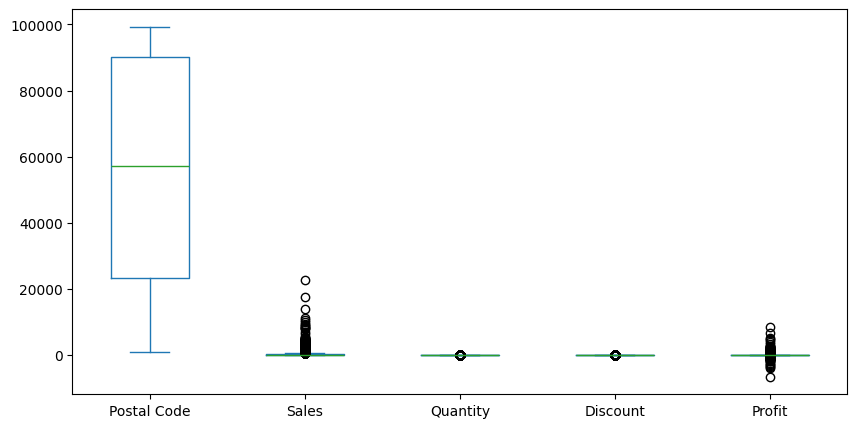

In [20]:
#detecting outliers
num.plot(kind="box",figsize=(10,5))

# Handling Missing Values

In [21]:
df['Postal Code']=df['Postal Code'].fillna(df['Postal Code'].mode()[0])

In [22]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Remove duplicate values

In [23]:
df.drop_duplicates(keep=False, inplace=True)

In [24]:
df.duplicated().sum()

0

# Handling Outliers

In [25]:
def out(x):
    q1=np.percentile(df[x], 25, interpolation='midpoint')
    q2=np.percentile(df[x], 50, interpolation='midpoint')
    q3=np.percentile(df[x], 75, interpolation='midpoint')
    IQR=q3-q1
    upperlimit=q3+1.5*IQR
    lowerlimit=q1-1.5*IQR
    print("uplim= ",upperlimit,"\n lower lim= ",lowerlimit)
    df[x]=np.where(df[x]>upperlimit,upperlimit,df[x])
    return upperlimit,lowerlimit

In [26]:
out('Profit')

uplim=  70.812375 
 lower lim=  -39.716625


(70.812375, -39.716625)

In [27]:
df['Profit']=np.where(df['Profit']<-39.72, -39.72,df['Profit'])

In [28]:
out('Sales')

uplim=  498.94149999999996 
 lower lim=  -271.74249999999995


(498.94149999999996, -271.74249999999995)

In [29]:
out('Discount')

uplim=  0.5 
 lower lim=  -0.30000000000000004


(0.5, -0.30000000000000004)

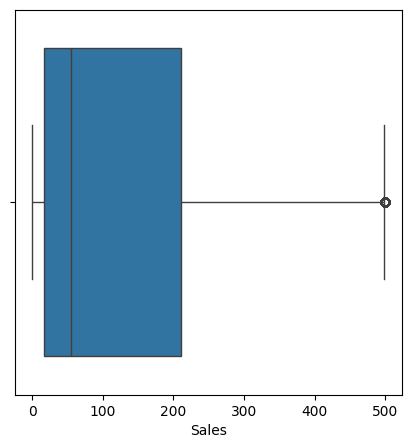

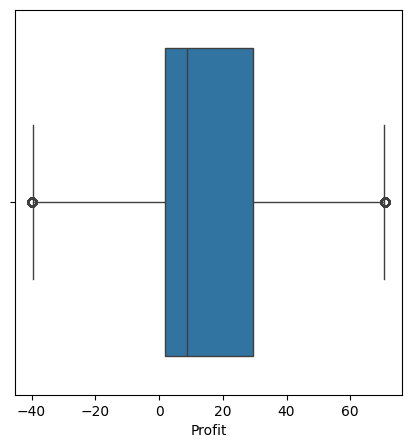

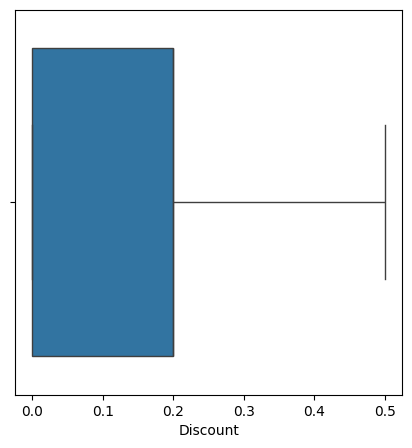

In [30]:
for column in contins:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df, x=column)

# Data Visualization

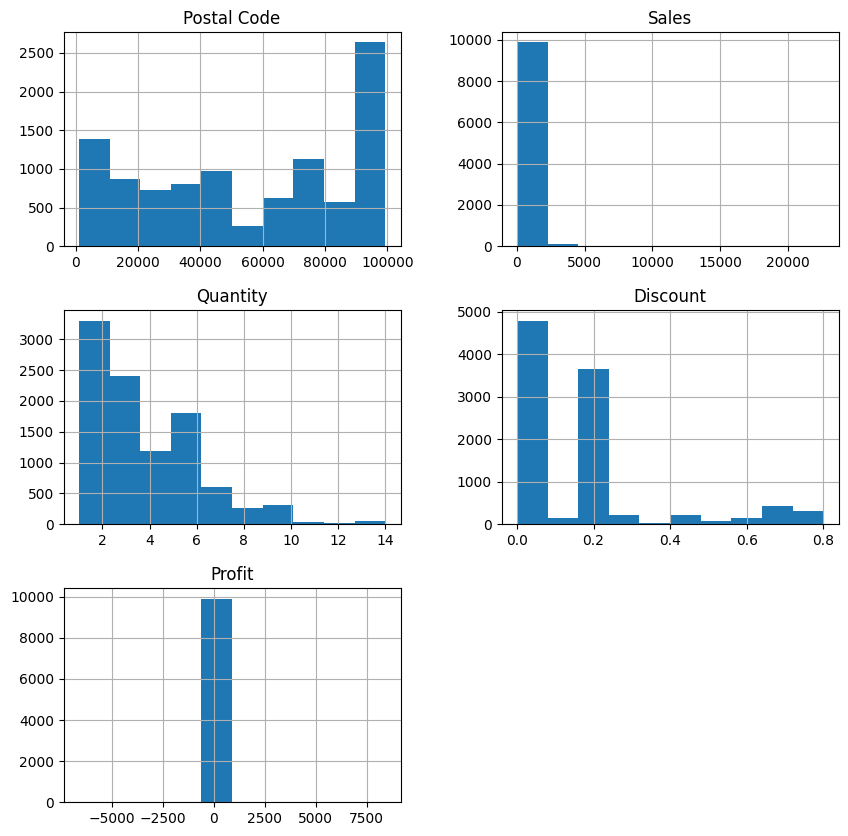

In [31]:
# Histogram 
num.hist(figsize=(10,10))
plt.show()

<Axes: xlabel='Category'>

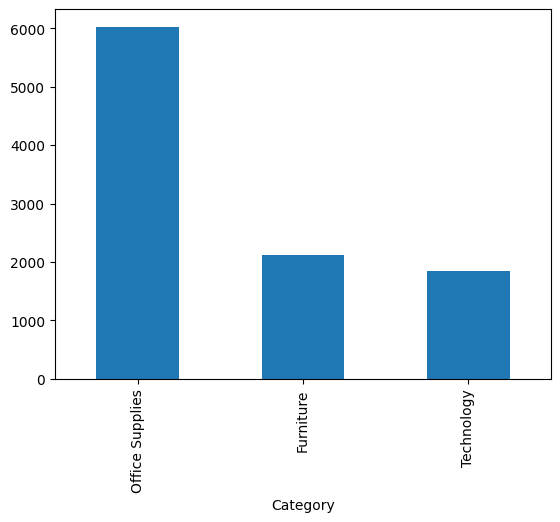

In [32]:
df.Category.value_counts().plot(kind='bar')

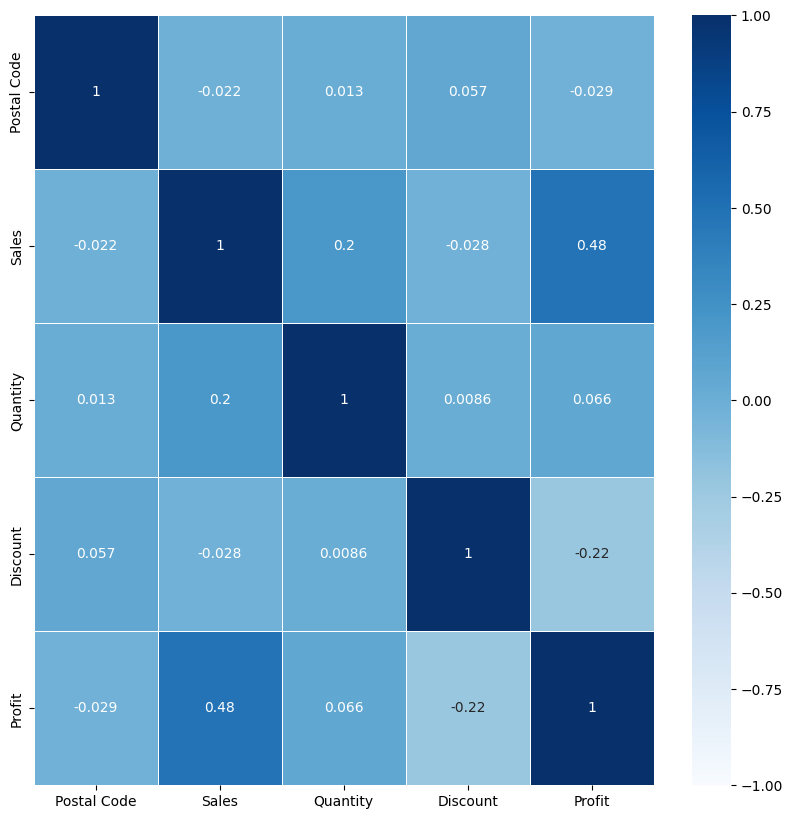

In [33]:
# find how the data is distributed and the how features are related to each other.
plt.figure(figsize=(10,10))
sns.heatmap(num.corr(), annot=True, linewidth=0.5 , cmap='Blues', vmin=-1, vmax=1)
plt.show()

<Axes: xlabel='Category', ylabel='Sales'>

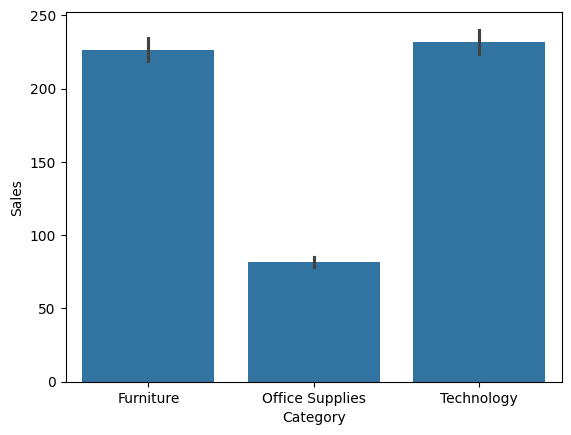

In [34]:
sns.barplot(x='Category',y='Sales',data=df)

In [35]:
#Checking for the different types of categories included
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [36]:
#Now we create a dataframe and we are going to show the data of furniture sales.
furniture=df.loc[df['Category']=='Furniture']
furniture

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.913600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",498.9415,3,0.00,70.812375
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,498.9415,5,0.45,-39.720000
5,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.169400
10,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,498.9415,9,0.20,70.812375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,CA-2016-168088,2016-03-19,2016-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041.0,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-39.720000
9964,CA-2017-146374,2017-12-05,2017-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711.0,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.432000
9980,US-2016-151435,2016-09-06,2016-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506.0,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.354800
9989,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.102800


In [37]:
#To know the first  date of order for the furniture category
furniture['Order Date'].min()

Timestamp('2015-01-06 00:00:00')

In [38]:
#To know the last date of order for the furniture category
furniture['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

In [39]:
furniture.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [40]:
f1=furniture.copy()

In [41]:
cols=['Order ID', 'Ship Date','Country', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
        'Quantity', 'Discount', 'Profit']

In [42]:
f1=f1.drop(f1[cols],axis=1)

In [43]:
f1

,Order Date,Sales
0,2017-11-08,261.9600
1,2017-11-08,498.9415
3,2016-10-11,498.9415
5,2015-06-09,48.8600
10,2015-06-09,498.9415
...,...,...
9962,2016-03-19,383.4656
9964,2017-12-05,13.4000
9980,2016-09-06,85.9800
9989,2015-01-21,25.2480


In [44]:
#sorting the dataframe according to the order dates
f1=f1.sort_values('Order Date')
f1

,Order Date,Sales
7474,2015-01-06,498.9415
7660,2015-01-07,76.7280
866,2015-01-10,51.9400
716,2015-01-11,9.9400
2978,2015-01-13,498.9415
...,...,...
1877,2018-12-29,393.5680
7632,2018-12-29,498.9415
5457,2018-12-29,68.4600
5131,2018-12-29,101.1200


# Indexing the Dataset

In [45]:
#To find the total sales of furniture occured on each dates
f1=f1.groupby('Order Date')['Sales'].sum().reset_index()

In [46]:
#set order date as the index column
f1.set_index('Order Date',inplace=True)

In [47]:
f1.head()

,Sales
Order Date,
2015-01-06,498.9415
2015-01-07,76.7280
2015-01-10,51.9400
2015-01-11,9.9400
2015-01-13,832.9405


In [48]:
#testing for stationary
from statsmodels.tsa.stattools import adfuller

In [49]:
test_result=adfuller(f1['Sales'])

In [50]:
#HO: It is non stationary
#H1: I t is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF TEST Statistic','p-value','#Lags used','Number of Obsercations Used']
    for value,label in zip(result,labels):
        print(label+':'+str(value) )
    if result[1] <=0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root,indicating it is non stationary")
        

In [51]:
adfuller_test(f1['Sales'])

ADF TEST Statistic:-6.347256061885603
p-value:2.664073505393702e-08
#Lags used:9
Number of Obsercations Used:879
strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary


In [52]:
#To see the frequency in datafram
f1.index

DatetimeIndex(['2015-01-06', '2015-01-07', '2015-01-10', '2015-01-11',
               '2015-01-13', '2015-01-14', '2015-01-16', '2015-01-19',
               '2015-01-20', '2015-01-21',
               ...
               '2018-12-18', '2018-12-19', '2018-12-21', '2018-12-22',
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [53]:
#Resampling the data into means of monthly sale of furniture and save it into a new variable
y_furniture=f1['Sales'].resample('MS').mean()
y_furniture

Order Date
2015-01-01    273.203808
2015-02-01    216.475900
2015-03-01    558.727882
2015-04-01    372.471893
2015-05-01    347.256062
2015-06-01    390.780084
2015-07-01    446.752556
2015-08-01    342.913250
2015-09-01    570.077429
2015-10-01    493.239906
2015-11-01    665.831532
2015-12-01    824.636325
2016-01-01    355.303500
2016-02-01    394.082583
2016-03-01    445.452444
2016-04-01    599.310308
2016-05-01    369.858967
2016-06-01    305.611528
2016-07-01    521.917605
2016-08-01    444.676137
2016-09-01    691.153368
2016-10-01    455.741526
2016-11-01    784.638429
2016-12-01    650.570432
2017-01-01    321.346067
2017-02-01    313.437864
2017-03-01    476.282167
2017-04-01    443.314658
2017-05-01    370.658000
2017-06-01    582.276938
2017-07-01    547.818441
2017-08-01    451.503959
2017-09-01    798.880667
2017-10-01    487.235447
2017-11-01    749.351020
2017-12-01    865.754346
2018-01-01    317.811700
2018-02-01    423.596569
2018-03-01    365.009790
2018-04-01    

# Plotting sales date of furniture category

<Axes: xlabel='Order Date'>

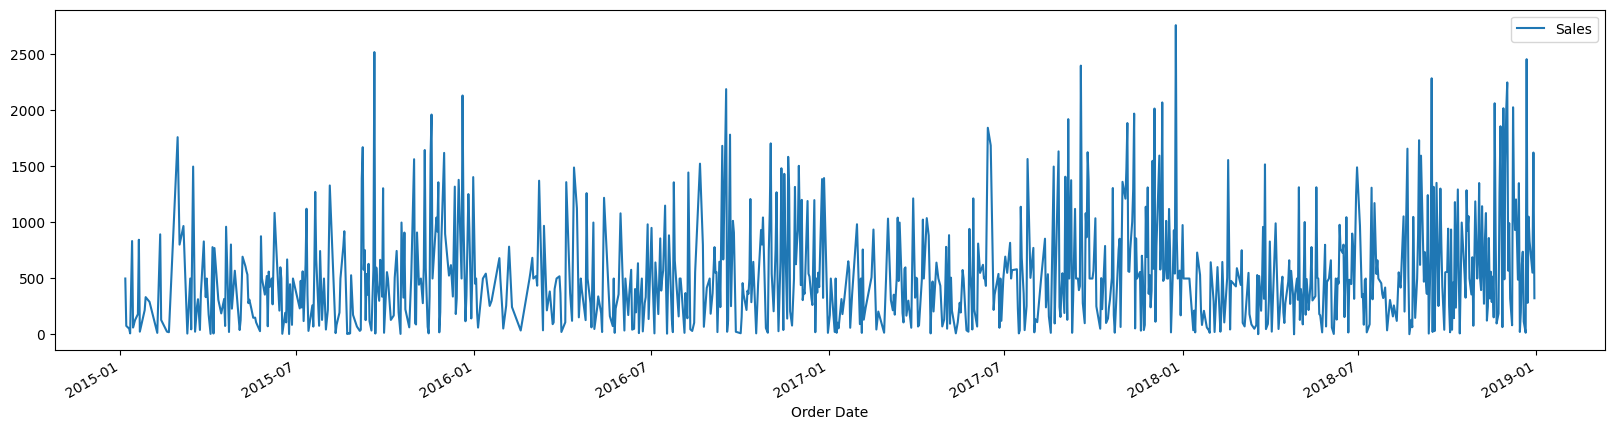

In [54]:
f1.plot(figsize=(20,5))

# Ploting mean sale date of furniture category

Text(0, 0.5, 'Sales')

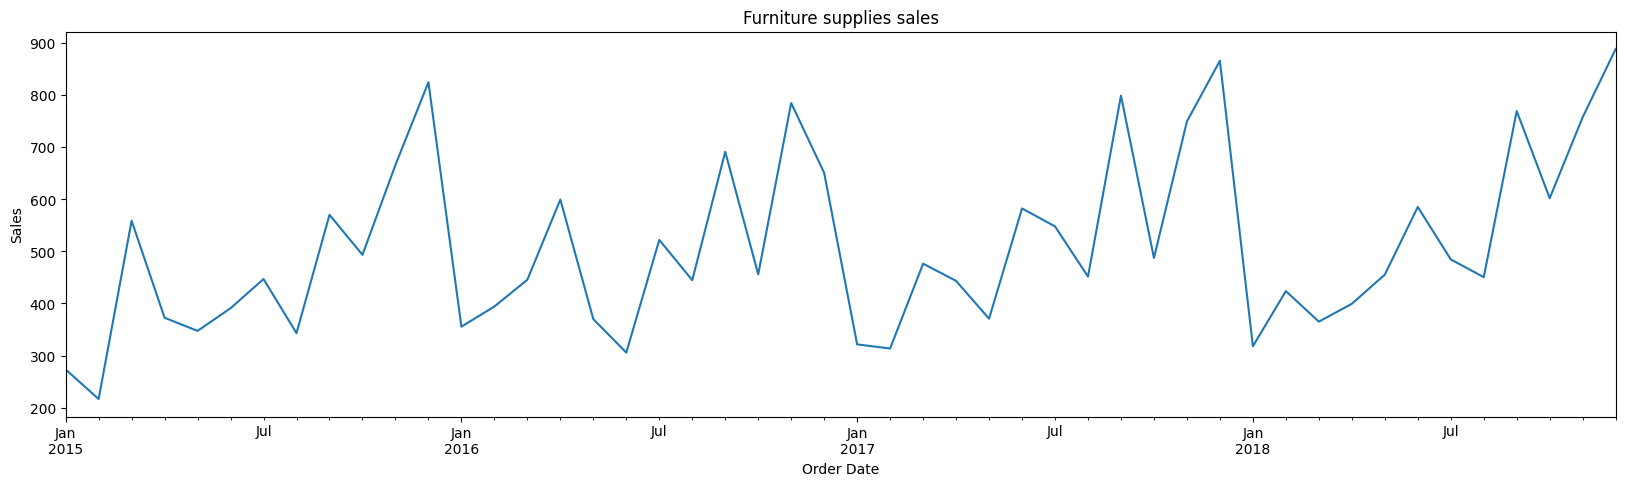

In [55]:
y_furniture.plot(figsize=(20,5))
plt.title("Furniture supplies sales")
plt.ylabel("Sales")

# Box Plot for each of the category 

Text(0.5, 1.0, 'Box plot on furniture sales')

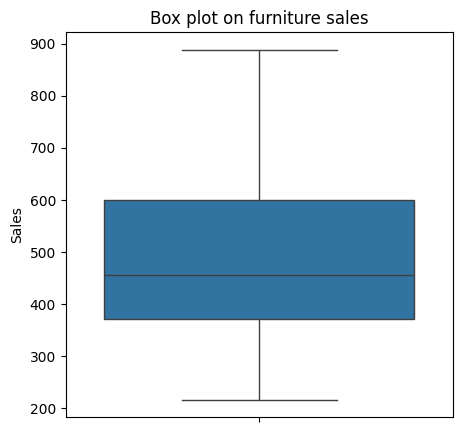

In [58]:
plt.figure(figsize=(5,5))
sns.boxplot(y_furniture).set_title('Box plot on furniture sales')

# ETC Decomposition for furniture

In [59]:
import statsmodels.api as sm

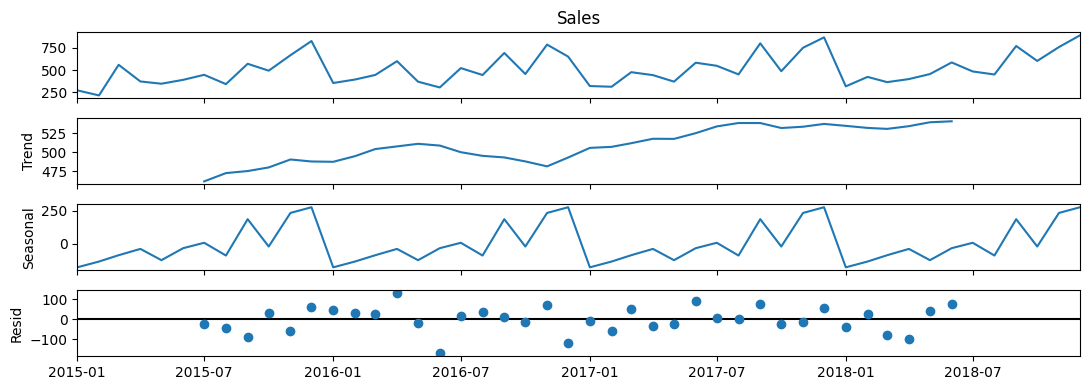

In [68]:
from pylab import rcParams
rcParams['figure.figsize']=11,4
decomposition_furniture = sm.tsa.seasonal_decompose(y_furniture,model='additive')
fig = decomposition_furniture.plot()
plt.show()

<Axes: xlabel='Order Date'>

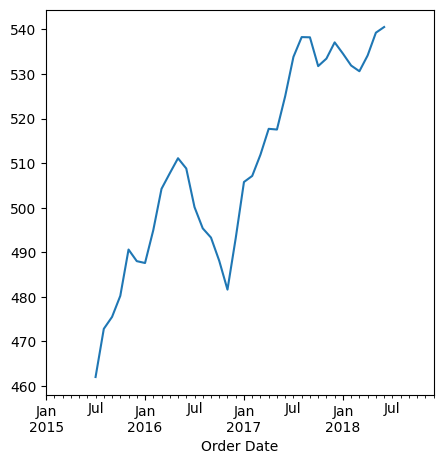

In [64]:
decomposition_furniture.trend.plot(figsize=(5,5))

<Axes: xlabel='Order Date'>

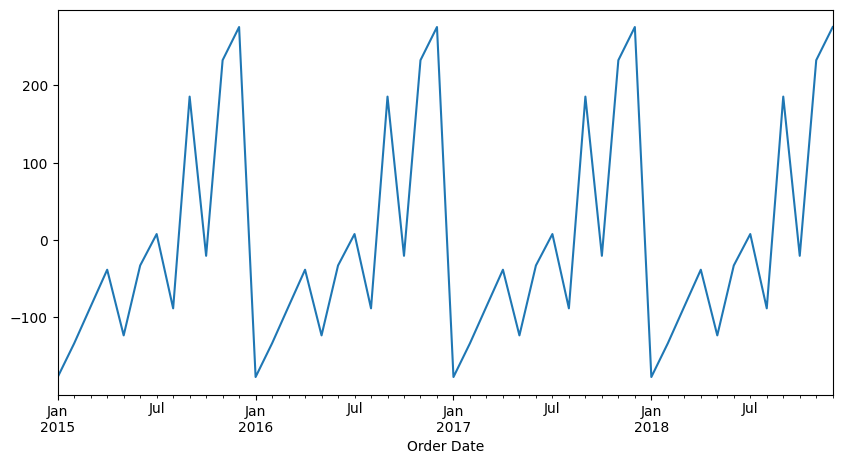

In [70]:
decomposition_furniture.seasonal.plot(figsize=(10,5))